In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'utils')))
if (not (path2add in sys.path)):
    sys.path.append(path2add)

In [3]:
from visualizations import bar_plot, pie_plot

In [4]:
data = pd.read_csv("../data/processed_ph_jan_24.csv")

In [5]:
data.head()

,Name,Upvotes,Reviews,Comments,Day Rank,Week Rank,Product Rating Float,Day,Num Topics,Pricing Codes
0,Polar Habits,779,14,126,1,6,4.5,0,3,1
1,socra,331,1,68,2,18,5.0,0,3,0
2,Heydai,298,4,82,3,22,5.0,0,3,1
3,Freelancer Stash,235,1,54,4,29,5.0,0,3,0
4,GPT Quiz Maker for Google Forms,150,0,38,5,40,0.0,0,3,1


In [6]:
data.set_index("Name", inplace=True)

In [7]:
data.head()

,Upvotes,Reviews,Comments,Day Rank,Week Rank,Product Rating Float,Day,Num Topics,Pricing Codes
Name,,,,,,,,,
Polar Habits,779,14,126,1,6,4.5,0,3,1
socra,331,1,68,2,18,5.0,0,3,0
Heydai,298,4,82,3,22,5.0,0,3,1
Freelancer Stash,235,1,54,4,29,5.0,0,3,0
GPT Quiz Maker for Google Forms,150,0,38,5,40,0.0,0,3,1


**Note:**
Our target variables are `Day Rank` and `Week Rank`.

In [8]:
data.describe()

,Upvotes,Reviews,Comments,Day Rank,Week Rank,Product Rating Float,Day,Num Topics,Pricing Codes
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,222.784158,11.506931,83.588119,8.629703,53.269307,3.084554,2.526733,2.778218,0.714851
std,204.533749,56.615807,104.728412,5.510768,34.846072,2.365014,1.871830,0.532962,0.682750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,82.000000,0.000000,25.000000,4.000000,24.000000,0.000000,1.000000,3.000000,0.000000
50%,142.000000,1.000000,51.000000,8.000000,52.000000,4.900000,2.000000,3.000000,1.000000
75%,297.000000,4.000000,95.000000,13.000000,80.000000,5.000000,4.000000,3.000000,1.000000
max,981.000000,997.000000,972.000000,20.000000,191.000000,5.000000,6.000000,3.000000,2.000000


**Observations:**
- For the columns `Upvotes`, `Reviews`, `Comments` there are extreme outliers present, where 50% of the data is less than 142, 1 and 51 respectively, the maximum value goes upto 900+.
- Minimum value is 0, but this represent real scenario of product launches, hence we focus of removing the extreme higher values.

**Actions:**
- Remove upper limit outliers from the data.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, Polar Habits to Very Disco
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Upvotes               505 non-null    int64  
 1   Reviews               505 non-null    int64  
 2   Comments              505 non-null    int64  
 3   Day Rank              505 non-null    int64  
 4   Week Rank             505 non-null    int64  
 5   Product Rating Float  505 non-null    float64
 6   Day                   505 non-null    int64  
 7   Num Topics            505 non-null    int64  
 8   Pricing Codes         505 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 39.5+ KB


In [10]:
# renaming columns for ease of use
data.columns = ['upvotes', 'reviews', 'comments', 'day_rank', 'week_rank', 'rating', 'day', 'num_topics', 'pricing']

### Handling Outliers

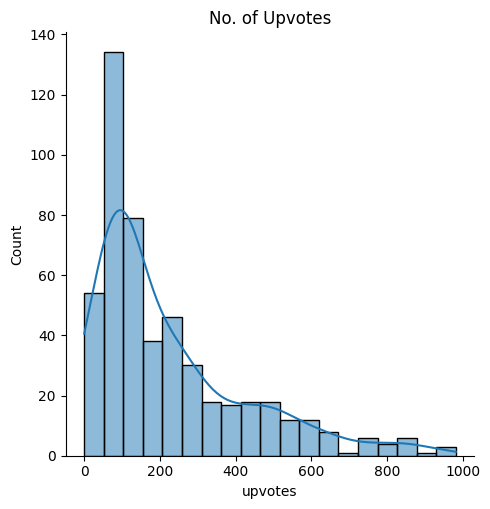

In [11]:
# visualizing a density plot
sns.displot(
    data=data,
    x='upvotes',
    kde=True
)
plt.title("No. of Upvotes")
plt.show()

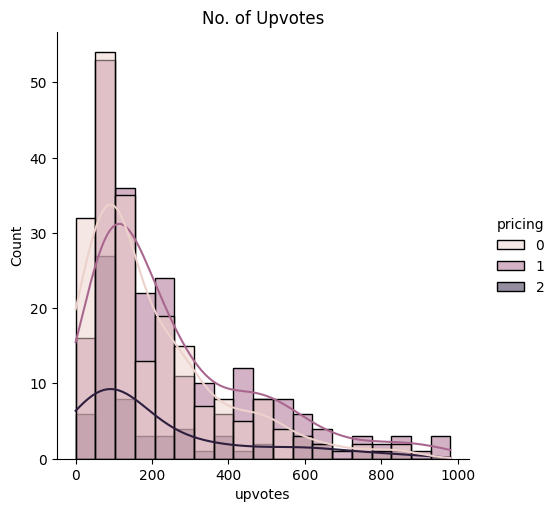

In [12]:
# visualizing a density plot with pricing category
sns.displot(
    data=data,
    x='upvotes',
    kde=True,
    hue='pricing'
)
plt.title("No. of Upvotes")
plt.show()

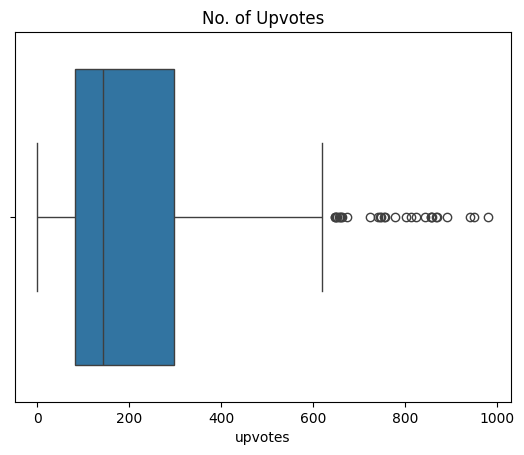

In [13]:
# visualizing box plot

sns.boxplot(
    data,
    x='upvotes'
)

plt.title("No. of Upvotes")

plt.show()

**Observations:**
- There are many outliers in the dataset, using the boxplot we can see, 50% of the products get less than 200 upvotes and 75% of the products get less than 300 upvotes.
- The distribution of no. of upvotes is also left-skwed.

**Action:**
- Products with extereme upvotes, can be biased hence, we will trim the data using the upper limit.

In [14]:
# calculating the inter quartile range
Q1 = data['upvotes'].quantile(.25)
Q3 = data['upvotes'].quantile(.75)

IQR = Q3 - Q1

In [15]:
lower_limit = Q1 - 1.5*(IQR)
upper_limit = Q3 + 1.5*(IQR)

In [16]:
new_data = data.loc[data['upvotes'] < upper_limit]

In [17]:
new_data.describe()

,upvotes,reviews,comments,day_rank,week_rank,rating,day,num_topics,pricing
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,189.067227,10.831933,74.852941,9.050420,56.037815,2.998319,2.552521,2.771008,0.701681
std,154.694891,57.316968,99.649129,5.393327,33.971732,2.393139,1.870371,0.542974,0.683087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,79.750000,0.000000,24.750000,5.000000,29.000000,0.000000,1.000000,3.000000,0.000000
50%,127.500000,1.000000,46.000000,9.000000,55.000000,4.800000,2.000000,3.000000,1.000000
75%,270.000000,3.250000,82.000000,13.000000,81.000000,5.000000,4.000000,3.000000,1.000000
max,619.000000,997.000000,972.000000,20.000000,191.000000,5.000000,6.000000,3.000000,2.000000


In [18]:
new_data.loc[
    new_data['reviews'] > 600
].shape

(1, 9)

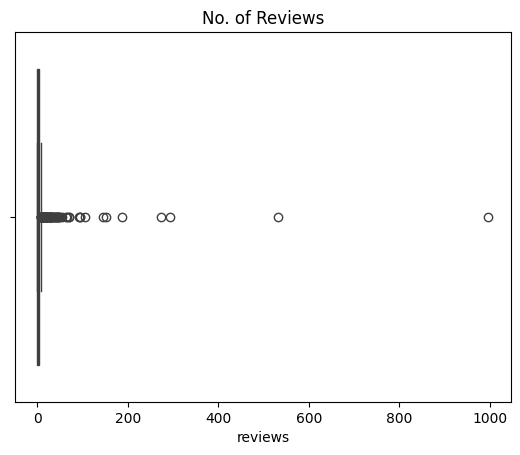

In [19]:
# visualizing box plot for number of reviews

sns.boxplot(
    data=new_data,
    x='reviews'
)

plt.title("No. of Reviews")
plt.show()

**Observations:**
- The extereme values might be an indication of biased reviews for some products. This is usually not the case in-general for products launched.

**Action:**
- Trimming the outliers

In [20]:
Q1 = new_data['reviews'].quantile(.25)
Q3 = new_data['reviews'].quantile(.75)
IQR = abs(Q3 - Q1)
upper_limit = Q3 + 1.5*(IQR)
lower_limit = Q1 - 1.5*(IQR)

In [21]:
clean_data = new_data.loc[
    (new_data['reviews'] < upper_limit)
]

In [22]:
clean_data.describe()

,upvotes,reviews,comments,day_rank,week_rank,rating,day,num_topics,pricing
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,179.541147,1.276808,59.556110,9.381546,59.246883,2.660349,2.605985,2.745636,0.720698
std,144.718931,1.780642,63.982204,5.362514,33.757835,2.451479,1.925971,0.565807,0.697707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,76.000000,0.000000,23.000000,5.000000,32.000000,0.000000,1.000000,3.000000,0.000000
50%,121.000000,1.000000,41.000000,9.000000,59.000000,4.500000,2.000000,3.000000,1.000000
75%,249.000000,2.000000,73.000000,14.000000,84.000000,5.000000,4.000000,3.000000,1.000000
max,617.000000,8.000000,693.000000,20.000000,191.000000,5.000000,6.000000,3.000000,2.000000


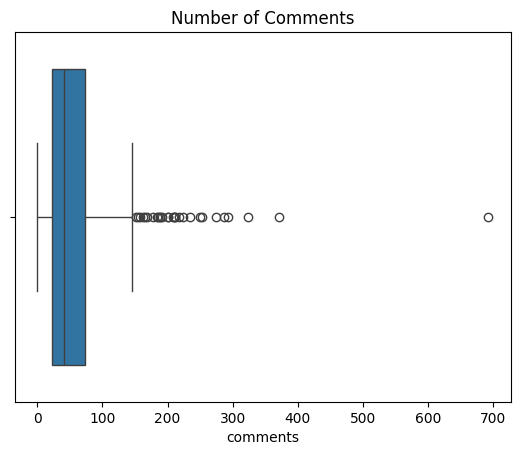

In [23]:
# visualizing box plot of number of comments

sns.boxplot(
    data=clean_data,
    x='comments'
)

plt.title("Number of Comments")
plt.show()

**Observations:**
- There is 1 outlier present in the data with number of comments around 700.

**Action:**
- Trim the outlier

In [24]:
Q1 = clean_data['comments'].quantile(.25)
Q3 = clean_data['comments'].quantile(.75)
IQR = abs(Q3 - Q1)
upper_limit = Q3 + 1.5*(IQR)
lower_limit = Q1 - 1.5*(IQR)

In [25]:
upper_limit

148.0

In [26]:
final_data = clean_data.loc[
    clean_data['comments'] < upper_limit
]
final_data.shape

(372, 9)

**Question: What pricing model is used by most of the products?**

In [27]:
pricing_counts = final_data['pricing'].value_counts()
pricing_counts

pricing
0    163
1    154
2     55
Name: count, dtype: int64

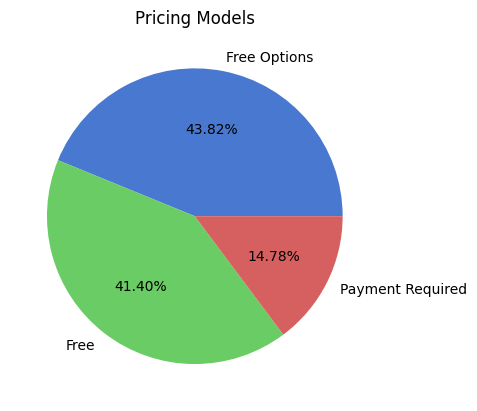

In [28]:
# visualizing the pricing models used
palette_color = sns.color_palette('muted6')
plt.pie(
    x=pricing_counts,
    autopct="%1.2f%%",
    colors=palette_color,
    labels=['Free Options', 'Free', 'Payment Required']
)
plt.title("Pricing Models")
plt.show()

**Observations:**
- Mostly products launched on Product Hunt offer `Free` and `Free Options` pricing models.

**Question:** How many tags/topics are the products using, this might be affecting their reach on Product Hunt.

In [29]:
topic_counts = final_data['num_topics'].value_counts()
topic_counts

num_topics
3    299
2     49
1     24
Name: count, dtype: int64

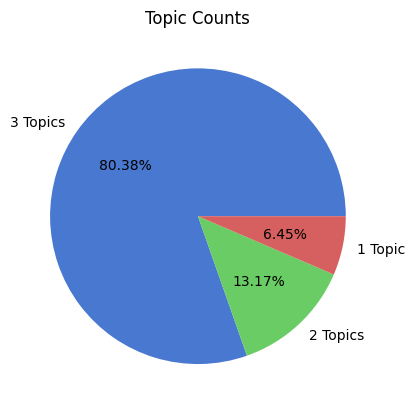

In [30]:
# topics percentage visualization

palette_color = sns.color_palette('muted6')
plt.pie(
    x=topic_counts,
    autopct="%1.2f%%",
    colors=palette_color,
    labels=['3 Topics', '2 Topics', '1 Topic']
)
plt.title("Topic Counts")
plt.show()

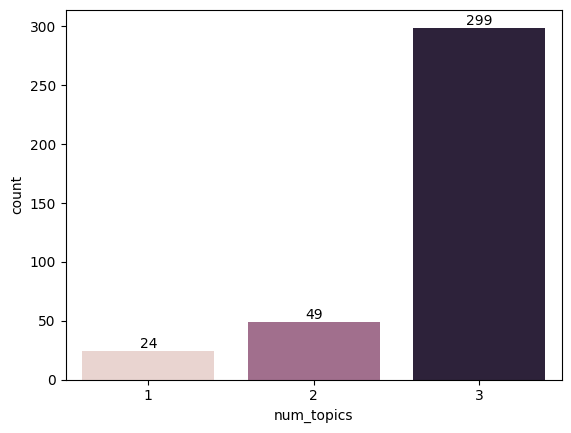

In [31]:
# visualizing the pricing models used

topic_counts = topic_counts.reset_index()
bar_plot(
    data=topic_counts,
    x='num_topics',
    y='count',
    hue='num_topics',
    legend=None
)

**Observations:**
- Mostly products, almost 80% product, have utilized all 3 topic options when launching the product. This can be due to getting better visibility and higher reach on Product Hunt.

Visualizing the impact of number of topics on upvotes

In [32]:
prods_3_topics = final_data.loc[
    final_data['num_topics'] == 3
]

prods_2_topics = final_data.loc[
    final_data['num_topics'] == 2
]

prods_1_topics = final_data.loc[
    final_data['num_topics'] == 1
]

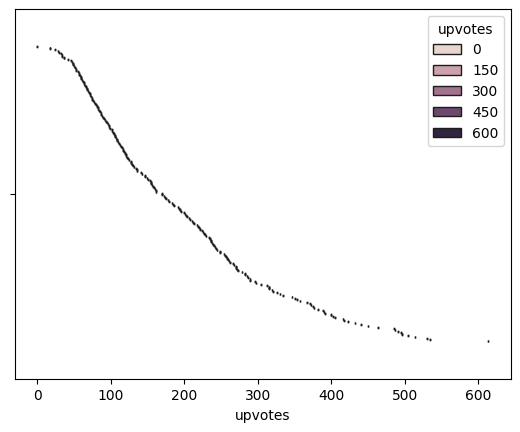

In [37]:
sns.boxplot(
    data=final_data,
    x='upvotes',
    hue='upvotes'
)
plt.show()

In [36]:
prods_3_topics['upvotes'].mean()

163.5418060200669

In [38]:
prods_2_topics['upvotes'].mean()

139.71428571428572

In [39]:
prods_1_topics['upvotes'].mean()

165.58333333333334

**Question:** Which day are mostly crowded with new products launche, this helps us to avoid getting into competition.

In [57]:
day_counts = final_data['day'].value_counts()
day_counts = day_counts.reset_index()

In [31]:
# day_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
# day_counts['weekday'] = data['day'].map(day_map)

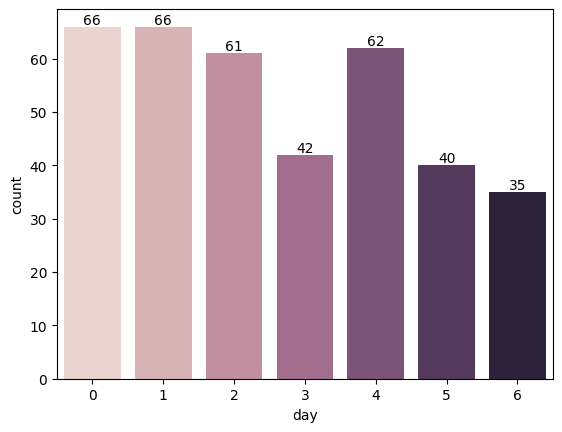

In [58]:
bar_plot(
    data=day_counts, 
    x='day', 
    y='count',
    hue='day',
    legend=None
    )

**Observations:**
- Mostly products are launched on `Monday` and `Tuesday`, while `Wednesday`, `Friday` and `Saturday` are very less crowded.
- `Wednesday`, `Friday` and `Saturday` can help us avoid getting into competition from other products.

**Question:** Are number of `reviews` and `comments` equal for products? Are people who are leaving a review also commenting on the launch?

In [59]:
sorted_data = final_data.sort_values('reviews')
sorted_data

,upvotes,reviews,comments,day_rank,week_rank,rating,day,num_topics,pricing
Name,,,,,,,,,
Very Disco,94,0,29,20,95,0.0,2,3,0
Jellypod,169,0,57,13,55,0.0,3,3,1
Starlink Direct to Cell,186,0,35,9,54,0.0,2,2,2
Invoicer Studio,134,0,26,12,65,0.0,3,3,0
Codara,115,0,41,11,72,0.0,2,3,2
...,...,...,...,...,...,...,...,...,...
Chat Interface for OpenAI Assistants,98,7,12,19,91,4.4,2,2,2
Fountain Podcast App,354,8,111,6,29,5.0,3,3,0
Preline UI v2.0,372,8,72,4,20,5.0,2,3,0


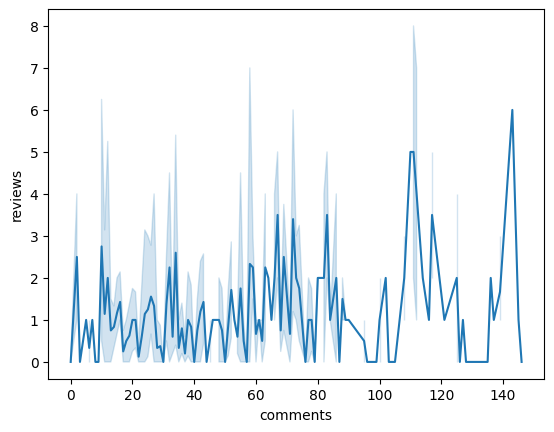

In [70]:
# visualizing reviews and comments

sns.lineplot(
    data=sorted_data,
    x='comments',
    y='reviews',
    
)
plt.show()

**Observations:**
- Number of `reviews` and `comments` vary for the products, large number of comments does not indicates higher number of reviews for the products.

**Question:** How many people leaving a review also upvoting the product.

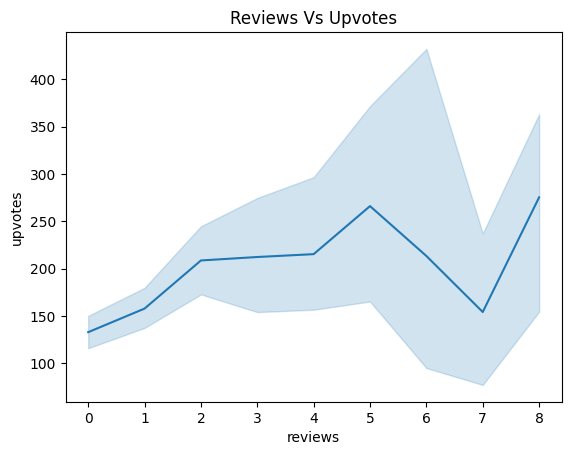

In [71]:
# visualizing reviews vs upvotes

sns.lineplot(
    data=final_data,
    x='reviews',
    y='upvotes'
)
plt.title("Reviews Vs Upvotes")
plt.show()

**Observations:**
- We are able to observe, with more number of `upvotes` we have more `reviews`. 
- Number of `upvotes` are much higer than number of `reviews` of any product.
- We can say, with more number of upvotes you have higher chances of getting reviews.

**Question:** How is number of `reviews` affecting the `day_rank`.

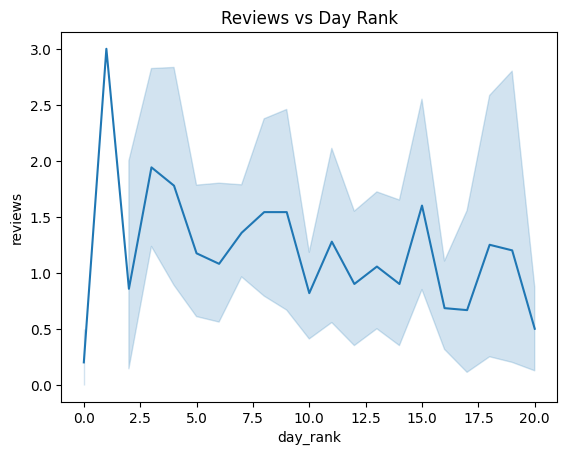

In [80]:
# visualizing reviews vs day rank

sns.lineplot(
    data=final_data,
    x='day_rank',
    y='reviews'
)
plt.ylim = final_data['reviews'].max()
plt.title("Reviews vs Day Rank")
plt.show()

**Observations:**
- We are able to observe, less number of reviews, makes your product rank lower during the day.
- Aim should be to acquire more number of `reviews` for the product.

**Question:** How much is `rating` affecting the `day_rank`.

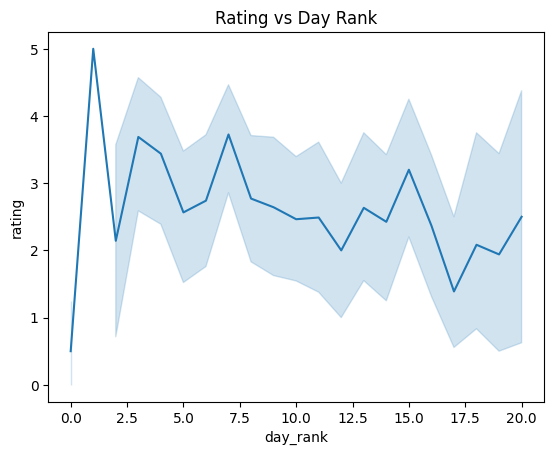

In [83]:
sns.lineplot(
    data=final_data,
    x='day_rank',
    y='rating'
)
plt.ylim = final_data['day_rank'].max()
plt.title("Rating vs Day Rank")
plt.show()

**Observations:**
- We are able to observe, less rating, makes your product rank lower during the day.
- Aim should be to acquire higher `rating` for the product.

Working with data containing outliers, because of less data avaialable

### Day Rank

In [92]:
# products in top 10 products of the day
top_10_list = data.loc[
    (data['day_rank'] > 0) &
    (data['day_rank'] <= 10)
]
top_10_list.shape

(298, 9)

In [93]:
# products in top 5 products of the day
top_5_list = data.loc[
    (data['day_rank'] > 0) &
    (data['day_rank'] <= 5)
]
top_5_list.shape

(154, 9)

In [95]:
# products in #1 product of the day
top_1_list = data.loc[
    data['day_rank'] == 1
]
top_1_list.shape

(31, 9)

In [96]:
products_count = pd.DataFrame(
    [top_1_list.shape[0], top_5_list.shape[0], top_10_list.shape[0]], 
    index=['#1', "#5", "#10"], 
    columns=['Counts'])

In [97]:
products_count

,Counts
#1,31
#5,154
#10,298


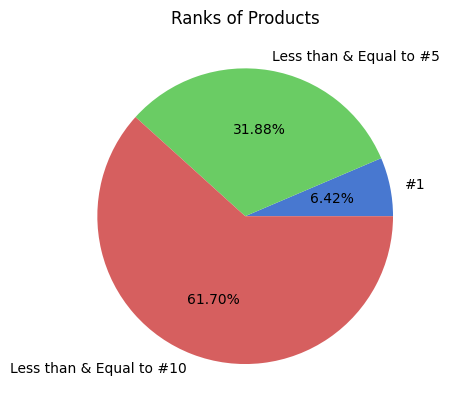

In [98]:
# visualizing the quantity of above 3 types of products

palette_color = sns.color_palette('muted6')
plt.pie(
    data=products_count,
    x='Counts',
    autopct="%1.2f%%",
    colors=palette_color,
    labels=['#1', "Less than & Equal to #5", "Less than & Equal to #10"]
)
plt.title("Ranks of Products")
plt.show()

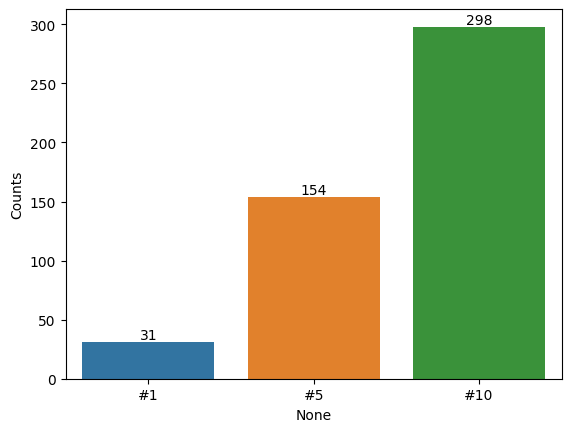

In [99]:
# visualizing using histogram

bar_plot(
    data=products_count, 
    x=products_count.index, 
    hue=products_count.index, 
    legend=False, 
    y='Counts'
    )

Top 10 Products of the day list

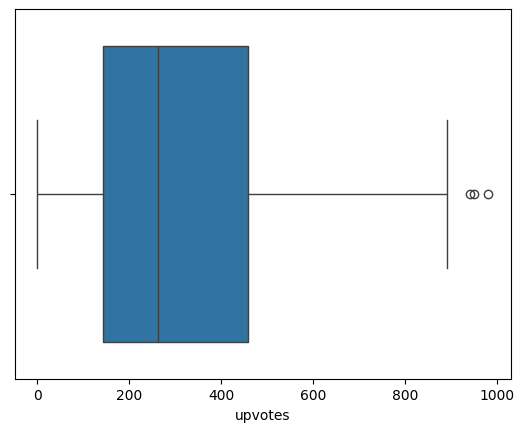

In [100]:
sns.boxplot(
    data=top_10_list,
    x='upvotes'
)
plt.show()

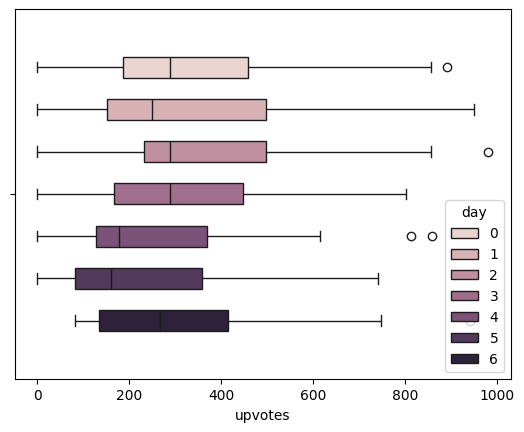

In [101]:
sns.boxplot(
    data=top_10_list,
    x='upvotes',
    hue='day',
    gap=.5
)
plt.show()

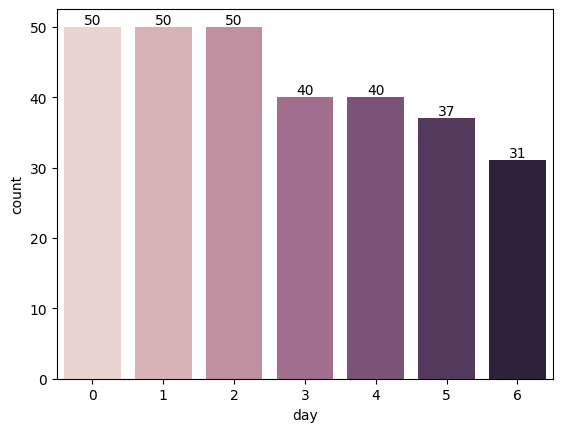

In [103]:
day_counts = top_10_list['day'].value_counts()
day_counts = day_counts.reset_index()

bar_plot(data=day_counts, x='day', y='count', hue='day', legend=None)

In [104]:
top_10_list['upvotes'].mean()

314.255033557047

In [105]:
# #10 products launched on friday
fri_top_10_list = top_10_list.loc[
    top_10_list['day'] == 5
]
fri_top_10_list.shape
fri_top_10_list['upvotes'].mean()

(37, 9)

In [107]:
# #10 products launched on tuesday
tue_top_10_list = top_10_list.loc[
    top_10_list['day'] == 2
]
tue_top_10_list.shape
tue_top_10_list['upvotes'].mean()

356.58

In [108]:
# #10 products launched on tuesday
mon_top_10_list = top_10_list.loc[
    top_10_list['day'] == 1
]
mon_top_10_list.shape
mon_top_10_list['upvotes'].mean()

330.16

In [109]:
# #10 products launched on sunday
sun_top_10_list = top_10_list.loc[
    top_10_list['day'] == 0
]
sun_top_10_list.shape
sun_top_10_list['upvotes'].mean()

348.86

In [111]:
avg_sun_mon_tue = (sun_top_10_list['upvotes'].mean() + mon_top_10_list['upvotes'].mean() + tue_top_10_list['upvotes'].mean()) / 3
avg_sun_mon_tue

345.2

**Observations:**
- The average no. of upvotes for procuts in top 10 products of the day dataframe is `314`.
- For products launched on **Friday** on average required less number of upvotes (approx 232) to get in the top 10 products of the day list with **minimal competition**.
- Products launched on **Monday**, **Tuesday** and **Wednesday** on average required more number of upvotes (approx 348) to get into top 10 products of the day.


In [113]:
top_10_pricing = top_10_list['pricing'].value_counts().reset_index()
top_10_pricing

,pricing,count
0,1,145
1,0,121
2,2,32
